In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\prudh\Downloads\Uber_Request_Data_Cleaned.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN


In [5]:
print("Shape:",df.shape)

Shape: (6745, 6)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,2016-07-11 19:02:00,2016-07-11 13:00:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [11]:
print("Missing Values:\n",df.isnull().sum())

Missing Values:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [13]:
print("Duplicate Rows:\n",df.duplicated().sum())

Duplicate Rows:
 0


In [15]:
for col in df.columns:
     print(f"{col} - {df[col].nunique()} unique values")
     print(df[col].value_counts(), '\n')

Request id - 6745 unique values
Request id
619     1
1132    1
1161    1
1157    1
1160    1
       ..
9       1
5605    1
5364    1
4316    1
6753    1
Name: count, Length: 6745, dtype: int64 

Pickup point - 2 unique values
Pickup point
City       3507
Airport    3238
Name: count, dtype: int64 

Driver id - 300 unique values
Driver id
27.0     22
176.0    21
177.0    21
84.0     21
22.0     21
         ..
208.0     8
123.0     7
42.0      7
265.0     6
300.0     6
Name: count, Length: 300, dtype: int64 

Status - 3 unique values
Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64 

Request timestamp - 5618 unique values
Request timestamp
2016-07-11 19:02:00    6
2016-07-11 17:57:00    6
2016-07-11 08:37:00    6
2016-07-11 09:40:00    6
2016-07-12 21:42:00    5
                      ..
2016-07-15 18:08:33    1
2016-07-15 04:50:54    1
2016-07-14 18:42:23    1
2016-07-13 19:26:50    1
2016-07-15 23:55:03    1
Name: count, Lengt

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


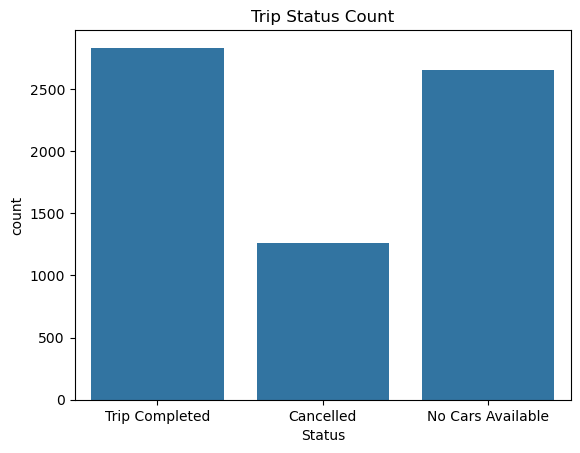

In [19]:
sns.countplot(data=df, x='Status')
plt.title("Trip Status Count")
plt.show()

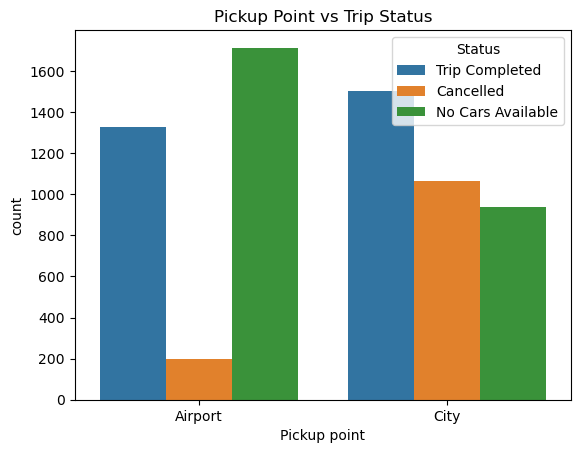

In [21]:
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title("Pickup Point vs Trip Status")
plt.show()

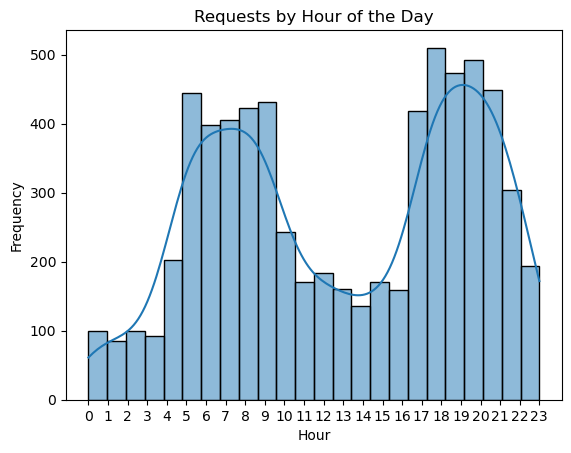

In [23]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df = df.dropna(subset=['Request timestamp'])  # Drop rows where timestamp conversion failed
df['hour'] = df['Request timestamp'].dt.hour

sns.histplot(df['hour'], bins=24, kde=True)
plt.title("Requests by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.show()
